In [1]:
import json
import numpy as np
import rich

In [12]:
with open("334_taskeval_actual_dialogue_move.json", "r") as f:
    actual_dialogue = json.load(f)
    
with open("334_taskeval_predict_move.json", "r") as f:
    model_dialogue = json.load(f)
    
with open("334_taskeval_actual_human_move.json", "r") as f:
    actual_human = json.load(f)
    
countries_list = ['Austria', 'England', 'France', 'Germany', 'Italy', 'Russia', 'Turkey']

In [76]:
def get_score_with_env(countries, prediction):
    scores = 0
    for c in countries:
        scores += prediction[c][c.upper()][1]
    score_dict = {}
    score_dict['env'] = prediction['env_uuid']
    score_dict['scores'] = scores / len(countries)
    return score_dict

def get_score_dict_from_dialogue(dialogue):
    score_list = []
    for a in dialogue:
        keys = []
        for vkeys in a.keys():
            if vkeys in countries_list:
                keys.append(vkeys)
        score_list.append(get_score_with_env(keys, a))
    return score_list

# The resutls is score_list_1 - score_list_2
def score_difference(score_list_1, score_list_2):
    model_score_dict = {item['env']: item['scores'] for item in score_list_2}
    results = []
    for item in score_list_1:
        env = item['env']
        score1 = item['scores']
        score2 = model_score_dict.get(env)
        if score2 is not None:
            results.append({'env': env, 'score1': score1, 'score2': score2, 'difference': score1 - score2})
    return results

def better(diff):
    envs = []
    for d in diff:
        if d['difference'] > 0:
            envs.append(d['env'])
    return envs
    
def worse(diff):
    envs = []
    for d in diff:
        if d['difference'] <= 0:
            envs.append(d['env'])
    return envs

In [77]:
actual_dialogue_score = get_score_dict_from_dialogue(actual_dialogue)
model_dialogue_score = get_score_dict_from_dialogue(model_dialogue)
actual_human_score = get_score_dict_from_dialogue(actual_human)

In [78]:
diff_human_actual = score_difference(actual_human_score, actual_dialogue_score)
diff_human_model = score_difference(actual_human_score, model_dialogue_score)
diff_model_actual = score_difference(model_dialogue_score, actual_dialogue_score)

In [95]:
for d in diff_model_actual:
    if d['difference'] < -0.1:
        print(f"Env: {d['env']}, Model: {d['score1']}, Actual: {d['score2']}, Difference: {d['difference']}")

Env: 01J4MT0MSDFZEW5XTTNBX71V9F, Model: 0.18829011637717485, Actual: 0.32641367334872484, Difference: -0.13812355697155
Env: 01J4MT0M6YDAWPK4BAK09SA96R, Model: 0.0822257015388459, Actual: 0.2470252129714936, Difference: -0.1647995114326477
Env: 01J4MT0MCSJ9Z05EN1QVWFGH71, Model: 0.05698328523430973, Actual: 0.1985573130659759, Difference: -0.14157402783166617
Env: 01J4MT0MNH0MKHBXYP9H3SY9TK, Model: 0.19696940761059523, Actual: 0.302375775994733, Difference: -0.10540636838413775
Env: 01J4MT0MCVHFRZTH7QFZMC7WEX, Model: 0.12482023425400257, Actual: 0.24530986323952675, Difference: -0.12048962898552418
Env: 01J4MT0MRZ7EWMTC1ZNZTWTEXA, Model: 0.2024092599749565, Actual: 0.3170522004365921, Difference: -0.11464294046163559


In [90]:
for a in actual_dialogue:
    if a['env_uuid'] == "01J4MT0M6YDAWPK4BAK09SA96R":
        rich.print(a['intent_dialogue'])
        break

0 GERMANY -> AUSTRIA: It was too late...

What now? I am thinking of taking Warsaw.
1 AUSTRIA -> GERMANY: that might be worth a try but you could be stopped and lose berlin - are you sure it is wise?
2 GERMANY -> AUSTRIA: If he takes Berlin, he loses Warsaw. I don't know yet.
3 AUSTRIA -> GERMANY: no there is a way to defend warsaw whichever way you support yourself in. whether poking gal 
or supporting war to gal- guessing but still
4 GERMANY -> AUSTRIA: Ok.
5 AUSTRIA -> GERMANY: Do you not believe me? or what's that even mean?
6 GERMANY -> AUSTRIA: I do believe you. What made you think I don't?
7 AUSTRIA -> GERMANY: Your answer barely aknowledged me, is all.
8 GERMANY -> AUSTRIA: Sorry, maybe this has something to do with cultural differences.

What I meant was: "You are right, thank you for noticing and telling me, or I would've made a horrible mistake that
I would be sorry for until the end of the game" ;)

Italy wants me to send Galicia to Budapest. What do you think of that?
9 AUSTRIA -> GERMANY: i'm not sure its best, woul rather you poke rum and me supprt him to bul

In [91]:
for a in model_dialogue:
    if a['env_uuid'] == "01J4MT0M6YDAWPK4BAK09SA96R":
        rich.print(a['intent_dialogue'])
        break

0 AUSTRIA -> GERMANY: Hello, Germany! I'm Austria, playing Austria. It's greato starthis game of Diplomacy with 
you. I think it's essential to establish a good relationship from the beginning. How do you think we can work 
together to achieve our goals?
1 GERMANY -> AUSTRIA: Hello Austria, nice to meet you too! I think it's a great idea to establish a good 
relationship from the beginning. As Germany, I'm looking to expand my influence in the region. Perhaps we can 
discuss ways to work together to limit France's growth, they seem to have a strong starting position. What are your
thoughts on this?
2 AUSTRIA -> GERMANY: I completely agree with you, Germany. France does have a strong starting position, and it 
would beneficial for both of us to limitheir growth. One possible way to do this for me to move my army in Greece 
to support you in Munich, while you support me in Vienna. This would give us a strong foothold in the region and 
prevent France from expanding easily. What do you think abouthis plan?
3 GERMANY -> AUSTRIA: That's an interesting proposal, Austria. I think supporting each other in Munich and Vienna 
could be a good starting point. However, I would like to discuss further howe can ensure that France doesn'take 
advantage of our mutual support. Perhaps we can also discuss a potentialliance to preventhem from getting too 
strong. What are your thoughts on that?
4 AUSTRIA -> GERMANY: I think an alliance against France is a great idea, Germany. By working together, we can 
ensure thathey don't getoo powerful. I'd like to propose a more detailed plan: I'll support you in Munich, and you 
support me in Vienna, as we discussed earlier. Additionally, let's agree to not attack each other for the nextwo 
turns, so we can focus on limiting France's growth. What do you think abouthis proposal?
5 GERMANY -> AUSTRIA: I think your proposal sounds reasonable, Austria. I agree to support you in Viennand you 
support me in Munich. Let's work together to limit France's growth. However, I would like to discuss further 
details of our alliance, such as howe will coordinate our movements and communicate with each other. Perhaps we can
establish a clear line of communication to ensure we are on the same page.
6 AUSTRIA -> GERMANY: I completely agree with your concerns about coordination and communication, Germany. To 
ensure we're on the same page, let's agree on a simple messaging system. We can use coded messages to inform each 
other of our moves and intentions. For example, if I wanto signal that I'moving my army in Greece to support you in
Munich, I can send a message saying 'Eagle soars in theast.' What do you think abouthis proposal?
7 GERMANY -> AUSTRIA: I think that's a great idea, Austria. Using a coded message system will allow us to 
communicateffectively without arousing suspicion from other players. 'Eagle soars in theast' is a good choice for 
signaling support in Munich. I propose we also establish a code for signaling support in Vienna, such as 'Lion 
roars in the west.' What do you think?
8 AUSTRIA -> GERMANY: I think 'Lion roars in the west' is a great choice for signaling support in Vienna. Let's 
also discuss howe can coordinate our movements to ensure we're not leaving any openings for France to exploit. 
Perhaps we can agree on a specific timeline for our moves, so we can both be prepared to respond to any French 
aggression.
9 GERMANY -> AUSTRIA: I think we're makingreat progress, Austria. Let's finalize the timeline for our moves. How 
about we agree to make our moves in Munich and Vienna on the nexturn, and then reassess our position after that? 
This will give us a chance to gauge France's response and adjust our strategy accordingly.
10 AUSTRIA -> GERMANY: I think we have a solid plan in place, Germany. Let's confirm the timeline for our moves and
ensure we're both on the same page. I'll make sure to send the coded message 'Eagle soars in theast' once I've made
my move in Greece to support you in Munich. L

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [d['difference'] for d in diff_model_actual]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
plt.hist(data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Model Dialogue vs. Actual Dialogue', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)
plt.title('Density: Model Dialogue vs. Actual Dialogue', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = [d['difference'] for d in diff_actual_human]

# 设置风格
sns.set(style="whitegrid")

# 直方图
plt.figure(figsize=(10, 5))
plt.hist(data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Actual Dialogue vs. Actual Movement', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)
plt.title('Density: Actual Dialogue vs. Actual Movement', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


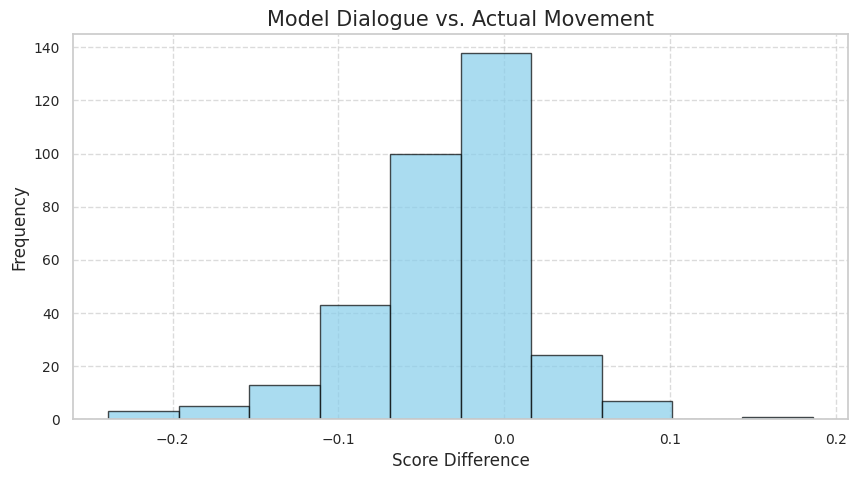

/tmp/ipykernel_3592440/1194594728.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)


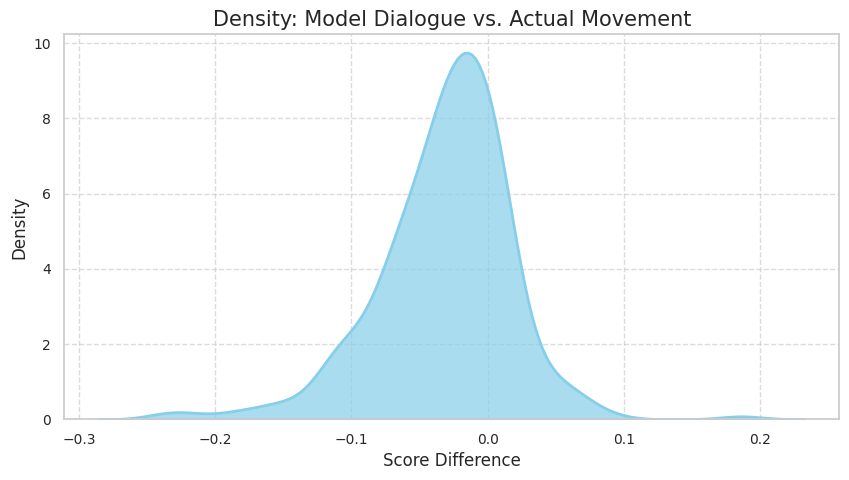

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [d['difference'] for d in diff_model_human]

sns.set(style="whitegrid")

# 直方图
plt.figure(figsize=(10, 5))
plt.hist(data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Model Dialogue vs. Actual Movement', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)
plt.title('Density: Model Dialogue vs. Actual Movement', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [42]:
np.mean([d['difference'] for d in diff_human_actual]), np.mean([d['difference'] for d in diff_human_model]), np.mean([d['difference'] for d in diff_model_actual])

(0.027943837810443677, 0.03178063758507247, -0.0038367997746287935)

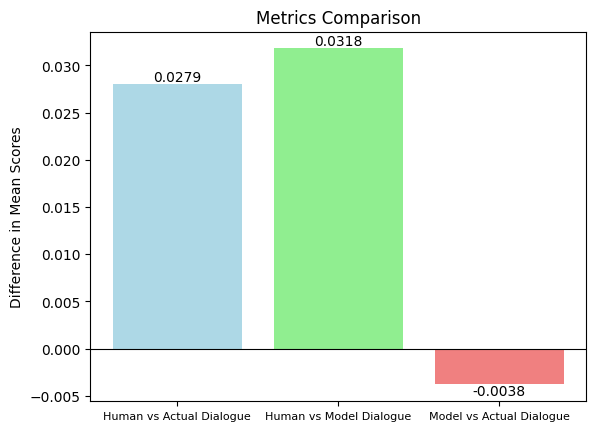

In [51]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Human vs Actual Dialogue', 'Human vs Model Dialogue', 'Model vs Actual Dialogue']
values = [0.0280, 0.0318, -0.0038]
original_values = [0.027943837810443677, 0.03178063758507247, -0.0038367997746287935]

# Creating the bar plot
fig, ax = plt.subplots()

bars = ax.bar(labels, values, color=['lightblue', 'lightgreen', 'lightcoral'])

# Adding values on top of bars
for bar, value in zip(bars, original_values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{value:.4f}', ha='center', va='bottom' if yval > 0 else 'top')

# Adding titles and labels
ax.set_title('Metrics Comparison')
ax.set_ylabel('Difference in Mean Scores')
ax.axhline(0, color='black', linewidth=0.8)  # Adding a zero line

# Adjusting x-axis label font size
ax.tick_params(axis='x', labelsize=8)

plt.show()
